# Understand Kalman Filter within 10 minutes

#### Author: Jason Zhang     &emsp; &emsp; Date: 2018/04/28 

## Sample Average: a Kalman Filter's view

Consider the following problem. We are given noisy measurements, $z_1, z_2, ..., z_k$, of an unknown constant, x.

We assume the additive model,

$z_k = x + v_k$,

where $v_k$'s are i.i.d. noises and $k = 1, 2, ... $

It is well-known from the law of large numbers that 

$\hat{x}_k = \frac{1}{k} \sum_{i=1}^{k} z_i$

is an optimal estimate that converges to the true $x$ as $k \rightarrow +\infty$ according to the central limit theorem.

We can re-write this estimate as

$\hat{x}_k = \frac{1}{k} \sum_{i=1}^{k-1} z_i + \frac{1}{k} z_i 
= \frac{k-1}{k} \frac{1}{k-1} \sum_{i=1}^{k-1} z_i + \frac{1}{k} z_i
= \hat{x}_{k-1} + \frac{1}{k}(z_k - \hat{x}_{k-1})$ 

which says, the best estimate of x after k measurements is the best estimate of x after (k-1) measurements plus a correction term $\frac{1}{k}(z_k - \hat{x}_{k-1})$ 

This correction term is the difference between how you expect the $k$-th measurement to be (based on the previous $k-1$ times of measurements, which is $\hat{x}_{k-1}$), and the actual $k$-th measurement $z_k$.

Let's assume $\hat{x}_{k-1} = x$. In this case, we should minimize the influence from the correction term - in fact we should make it zero, since even in the best case this term cannot further improve the estimate. 

What if $\hat{x}_{k-1} \ne x$, and there is quite some distance between them? In that case, we should rely more on the correction term.

The above re-written estimate is a conbimation of these 2 considerations. As $k$ becomes large, so is our confidence in the estimate. Thus, we rely less and less on the correction term with the diminishing $\frac{1}{k}$.

This is the essential of a Kalman filter: you choose between a prediction based on you so-far understanding of the system, $\hat{x}_{k-1}$,and a correction based on your actual measurement, $z_k - \hat{x}_{k-1}$, with a confidence  $\frac{1}{k}$ indicating which of them you favor. The combination makes your estimate.

## Confidence: a view from the variance of the sample mean
Most of a Kalman Filter is quite intuitive, with only one exception: the confidence.

In the formal definition, it is called 'Kalman Gain'. In the above example, it is $\frac{1}{k}$, the key to the balance between prediction and correction.

To understand its meaning before diving into the formal definition, we need to deduce a simple equation: $\frac{1}{k} = 1 / ({1 + \frac{R}{\hat{\sigma}_k})}$,

where $R$ is the true variance of the noise $v_k$'s (from whatever distribution), and $\hat{\sigma}_k$ measures how much we believe the accuracy of our prediction. 

How do we quantify such belief of any random variable? With variance, of course! Smaller variance means higher belief in its accuracy! 

Again, from central limit theorem, we know that our prediction $\hat{x}_{k-1}$, which is the sample mean from the previous $k-1$ measurements, has a variance which is the true variance divided by its sample size. 

Thus the variance of our prediction is $\hat{\sigma}_k = \frac{R}{k-1}$. By simple substitution we prove that $\frac{1}{k} = 1 / ({1 + \frac{R}{\hat{\sigma}_k})}$ holds.

So, the meaning of confidence becomes clear: as we proceed with more measurements, the sample size grows and the variance of our prediction diminishes. We therefore believe there is less and less gain of information from the correction term. We represent such process by putting the ratio of true variance and the variance of our prediction at the denominator, hence the diminishing Kalman Gain, $\frac{1}{k}$.

## From simple to formal: putting altogether

The formal definition of a Kalman Filter is simply an extention from the above example to make it adaptable to more complex systems. 

By 'complex' I mean the system can be dynamic (instead of being a static mean value, its true value can change and such change also comes with noises), and multi-dimensional (e.g. Cartesian coordinates). For instance, the movement of a point in Newtonian mechanics with 3D coordinates.

### System Dynamics
Denote the status of the system as $X$, then the dynamic of the system is captured by

$X_{k | k-1} = A_{k} * X_{k-1 | k-1} + B_{k} * U_{k}$, $...(1)$ 

where $X_{k | k-1}$ is our prediction of the system at step $k$ from step $k-1$, $X_{k-1 | k-1}$ is the estimate of system status at step $k-1$,

$A_k$ describes the transition of system status, for instance the growth rate if $X$ is population.

$B_{k}$ and $U_{k}$ are control variables that introduces an independent offset from previous system status, for instance immigration if $X$ is population.

(It is obvious that we assumed the true dynamics as follows)

$X_{k} = A_{k} * X_{k-1} + B_{k} * U_{k} + W_{k}$, 

where $X_k$ is the true status at step $k$, 

and $W_{k}$ is the noise that comes with the dynamics, for instance the random error between expected birth and de facto birth. We denote its variance as $Q$.

### Combined Estimate
Again, the estimate of the system status is drawn from prediction and correction

$X_{k | k} = X_{k | k-1} + Kg_k * (Z_k - H_k * X_{k | k-1})$, $...(2)$      

where $X_{k | k}$ is our estimate of system status at step $k$, and $Kg_{k}$ is the Kalman Gain,

$Z_{k}$ is our noisy measurement of the system, and $H_k$ is the numerical correspondance from status to measurement.

(more formally, $Z_k = H_k * X_{k} + V_{k}$ where $X_{k}$ is the true status at step $k$, and $V_{k}$ is the noise whose variance is $R$)

Note how $H_k * X_{k | k-1}$ relates to $\hat{x}_{k-1}$ in our simple case.

### Kalman Gain

As said before, Kalman Gain is scaled by how much we believe in the accuracy of our prediction. Such belief is quantified as the ratio of variance. 

In formal defition it is written as

$Kg_k = (P_{k | k-1} * H_k^T) / (H_k * P_{k | k-1} * H_k^T + R)$, $...(3)$

where $H_k$ is the same old mapping matrix of measurement and $R$ is still, the variance of noise $V$.

$P$ is the variance - or to be precise - covariance to suit the multi-dimensional case 

and $P_{k | k-1}$ is the estimate of such covariance from step $k-1$ at step $k$ corresponding to $X_{k | k-1}$.

Note how in our 1D simple case $Kg_k$ degrades into $1/k$.

### Covariance Matrix

Suppose we have already a covariance matrix of $X_{k-1 | k-1}$, and we predict the covariance of $X_{k | k-1}$ by

$P_{k | k-1} = A_k * P_{k-1 | k-1} * A^T_k + Q$, $...(4)$

where $A_k$ describes the system dynamics (as before), and $Q$ is the variance of the noise from the system dynamics (as before).

Note how this formula is related to the computation of $X_{k | k-1}$ from $X_{k-1 | k-1}$ in 'System Dynamics' section. 


Based on our prior intuition, we know the covariance diminishes in an inverse proportionality to the number of measurements. 

This inverse proportionality $1/k$ is the Kalman Gain in that simple case. 

We generalize the diminishing with respect to Kalman Gain

$P_{k | k} = (I - Kg_k * H_k) * P_{k | k-1}$, $...(5)$

where $I$ is an identity matrix, $P_{k | k}$ is the covariance corresponding to $X_{k | k}$. 

Note how this formula is related to the computation of $X_{k | k}$ from $X_{k | k-1}$ in 'Combined Estimate' section. 

As an aside, there are multiple ways with differnt objectives to update $P_{k | k}$. The above is called Joseph Form which tries to minimize the distance from our estimate $X_{k|k}$ to the true value $X_k$. This is the most used form, though, as in most cases you do want to minimize that distance.

### Put Together

$(1), (2), (3), (4), (5)$ together describe a complete Kalman Filter.

We first initialize 2 parameters: $X_{0|0}$ and $P_{0|0}$, and then begin iterating by making a measurement $Z_1$.

Each iteration is 2-stage, the first is $\bf{prediction}$:

$X_{k | k-1} = A_{k} * X_{k-1 | k-1} + B_{k} * U_{k}$, $...(1)$ predict system state 

$P_{k | k-1} = A_k * P_{k-1 | k-1} * A^T_k + Q$, $...(4)$ predict system covariance

The second is $\bf{update}$:

$Kg_k = (P_{k | k-1} * H_k^T) / (H_k * P_{k | k-1} * H_k^T + R)$, $...(3)$ update Kalman Gain

$P_{k | k} = (I - Kg_k * H_k) * P_{k | k-1}$, $...(5)$ update covariance estimate 

$X_{k | k} = X_{k | k-1} + Kg_k * (Z_k - H_k * X_{k | k-1})$, $...(2)$ update system status estimate

### A Simple Try

Our simple example is actually a static, directly measured 1-D case thus $A=1$, $U=0$, $H=1$, $Q=0$.

With special initialization: a known $Z_1$ as $X_{1|1}$, and $P_{1 | 1} = R$

$\bf{prediction}$:

$X_{k | k-1} = X_{k-1 | k-1}$, $...(1)$ predict system state 

$P_{k | k-1} = P_{k-1 | k-1}$, $...(4)$ predict system covariance

$\bf{update}$:

$Kg_k = (P_{k | k-1}) / (P_{k | k-1} + R)$, $...(3)$ update Kalman Gain

$P_{k | k} = (1 - Kg_k) * P_{k | k-1}$, $...(5)$ update covariance estimate 

$X_{k | k} = X_{k | k-1} + Kg_k * (Z_k - X_{k | k-1})$, $...(2)$ update system status estimate

It can be easily proven by induction that $X_{k|k} = \frac{1}{k} \sum_{i=1}^{k} Z_i$, and $Kg_k = \frac{1}{k}$

## A Simple Python Implementation

In real application we usually initialize $X_{0 | 0}$ and $P_{0 | 0}$ before any iteration. 

We also need to set the values for $Q$ and $R$, and input our model parameters $A, B, H$.

Unlike in our simple case, we do not know the exact value of $R$, so the initial value of $P_{0 | 0}$ depends on your prior knowledge of your model accuracy. If you think your initial state is not very accurate, the value should be large, and vice versa.

In [1]:
class KalmanFilter1D:
    
    def __init__(self, X, P, A, B, H, Q, R):
        self.X_estm = X
        self.P_estm = P
        self.A = A
        self.B = B
        self.H = H
        self.Q = Q
        self.R = R
        
    def iterate(self, Z, U):
        # prediction
        X_pred = self.A * self.X_estm + self.B * U
        P_pred = self.A * self.P_estm * self.A + self.Q
        
        # update
        Kg = (P_pred * self.H) / (self.H * P_pred * self.H + self.R)
        self.P_estm = (1 - Kg * self.H) * P_pred
        self.X_estm = X_pred + Kg * (Z - self.H * X_pred)
        
        return self.X_estm

### A Practical Example: Jason Goes On A Diet

Suppose Jason has finally decided to go on a diet before having to add one size up on his clothes.

He has an unreliable weight scale which, from its product specifications, has a random error with the variance of 16 ($kg^2$).

With this inaccurate scale, he wants to monitor how his diet works out on his weight on a weekly basis.

Based on the calculation of calories, Jason's plan is expected to reduce his weight by 0.8$kg$ per week.

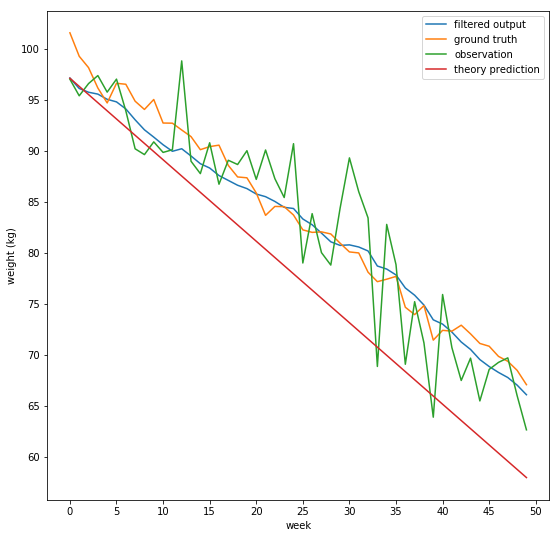

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Jason's diet goes on for 50 weeks
N = 50
# scale variance
R = 16
# Jason's true inital weight is 100kg
X_true = 100 
# Jason's estimated initial weight is scaled with random error
X_init = np.random.normal(loc=X_true, scale=np.sqrt(R))
# the weight loss rate is 0.8kg per week by theory
U_estm = -0.8
# the actual weight loss rate, unfortunately is not that optimistic
U_true = -0.66
# by including the occasional snacks, Jason concluded the weight loss has a variance of 0.1
Q_estm = 0.1
# the actual weight loss has a variance of 1
Q_true = 1


# the theoretical decrease is 0.8 kgs per week
Ts = [X_init + U_estm * (i+1) for i in range(N)]
# the true weight decreases by 0.66 kgs per week with a variance of 1
Xs = [np.random.normal(loc=X_true + U_true * (i+1), scale=np.sqrt(Q_true)) for i in range(N)]
# the observed weight has a variance of 16
Zs = [np.random.normal(loc=Xs[i],scale=np.sqrt(R)) for i in range(N)]

# it is obvious from the model that A=1, B=1, H=1
# and we set the estimated process variance Q as calculated, observation variance R as specified
# finally, the initial error covariance P is set as the observation variance
kf = KalmanFilter1D(X=X_init, A=1, B=1, H=1, 
                    P=R, Q=Q_estm, R=R)
# iterately filter the observation
outputs = [kf.iterate(Z = Zs[i], U=U_true) for i in range(N)]

# draw the outputs
plt.figure(figsize=(9,9))
plt.xlabel('week')
plt.xticks([i for i in range(0, N+10, 5)])
plt.ylabel('weight (kg)')
plt.yticks([i for i in range(50, 110, 5)])
plt.plot(outputs, label='filtered output')
plt.plot(Xs, label='ground truth')
plt.plot(Zs, label='observation')
plt.plot(Ts, label='theory prediction')
plt.legend()

## Conclusion

That's pretty cool! 

From the image you can see that despite the wild divergence of the observation, and the disastrous optimism of the theory prediction, the filtered output is remarkably close to the ground truth! Jason will not be blinded by either theory or observation, but be crystal clear about his not-working-so-well diet! 

In conclusion, with carefully calculated confidence called Kalman Gain, Kalman Filter effectively combines theory prediction and actual observation, even when both of them have terrible performance, to generate high-quality results.

## Reference

The simple example is taken from [Dr. Ho's blog on a technical explanation of Kalman Filter](http://blog.sciencenet.cn/home.php?mod=space&uid=1565&do=blog&id=14253).

The 2-stage iteration is modified from [Wikipedia of Kalman Filter](https://www.wikiwand.com/en/Kalman_filter).